# Machine Learning Project : Bank Marketing Prediction

---

# Contents

## 1. [Data Set Check](#1)
   - 1.1 [Null Data Check](#1.1)
   - 1.2 [Target Label](#1.2)
       
       
## 2. [Exploratory Data Analysis (EDA)](#2)
   - ~~2.0 [SampleId](#2.0)~~
   - 2.1 [age](#2.1)
   - 2.2 [job](#2.2)
   - 2.3 [marital](#2.3)
   - 2.4 [education](#2.4)
   - 2.5 [default](#2.5)
   - 2.6 [balance](#2.6)
   - 2.7 [hosing](#2.7)
   - 2.8 [loan](#2.8)
   - 2.9 [contact](#2.9)
   - 2.10 [day](#2.10)
   - 2.11 [month](#2.11)
   - ~~2.12 [duration](#2.12)~~
   - 2.13 [campaign](#2.13)
   - 2.14 [pday](#2.14)
   - 2.15 [previous](#2.15)
   - 2.16 [poutcome](#2.16)
   

# 1. Data Set Check<a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df_train= pd.read_csv('./train.csv')

In [3]:
display(df_train.head())

,SampleId,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,57,unemployed,married,secondary,no,2299,no,no,cellular,12,nov,39,3,-1,0,unknown,False
1,1,31,services,married,secondary,no,246,yes,no,unknown,16,may,230,2,-1,0,unknown,False
2,2,58,retired,married,secondary,no,1230,no,no,cellular,20,may,420,1,87,1,failure,True
3,3,32,technician,single,tertiary,no,569,no,yes,cellular,29,jan,348,1,-1,0,unknown,False
4,4,54,entrepreneur,married,secondary,no,0,no,yes,cellular,15,jul,209,4,-1,0,unknown,False


In [4]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

## Bank Marketing Data Set.
- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
---
 - train.csv - training samples with target variable
 - test.csv - testing samples. Predict target variable for them
 - sample_submission.csv - example of how to save your predictions
 
---

 - Columns:
---

 - age (numeric)
 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue- -     collar","self-employed","retired","technician","services")
 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 - education (categorical: "unknown","secondary","primary","tertiary")
 - default: has credit in default? (binary: "yes","no")
 - balance: average yearly balance, in euros (numeric)
 - housing: has housing loan? (binary: "yes","no")
 - loan: has personal loan? (binary: "yes","no")
---
 - related with the last contact of the current campaign:
---
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
---
 - other attributes:
---
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
---
 - target variable:
---
 - y - has the client subscribed a term deposit? (binary: true, false)

In [5]:
df_train.corr()

,SampleId,age,balance,day,duration,campaign,pdays,previous,y
SampleId,1.000000,0.002504,0.007944,0.008337,0.006422,-0.003398,0.012297,0.006561,0.000213
age,0.002504,1.000000,0.090284,-0.010777,-0.005223,0.005796,-0.021528,-0.001390,0.019048
balance,0.007944,0.090284,1.000000,0.004264,0.018513,-0.012204,0.004157,0.006900,0.040630
day,0.008337,-0.010777,0.004264,1.000000,-0.036149,0.169297,-0.089847,-0.046980,-0.029679
duration,0.006422,-0.005223,0.018513,-0.036149,1.000000,-0.089393,-0.003133,-0.000088,0.397643
campaign,-0.003398,0.005796,-0.012204,0.169297,-0.089393,1.000000,-0.089710,-0.032102,-0.076129
pdays,0.012297,-0.021528,0.004157,-0.089847,-0.003133,-0.089710,1.000000,0.406006,0.102845
previous,0.006561,-0.001390,0.006900,-0.046980,-0.000088,-0.032102,0.406006,1.000000,0.083052
y,0.000213,0.019048,0.040630,-0.029679,0.397643,-0.076129,0.102845,0.083052,1.000000


In [6]:
df_train.describe()

,SampleId,age,balance,day,duration,campaign,pdays,previous
count,22605.000000,22605.000000,22605.000000,22605.000000,22605.000000,22605.000000,22605.000000,22605.000000
mean,11302.000000,40.915152,1343.202787,15.826322,257.939969,2.778191,40.384782,0.584871
std,6525.645753,10.671158,2987.094634,8.310309,256.480480,3.122477,100.254652,2.640767
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,5651.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,11302.000000,39.000000,443.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,16953.000000,49.000000,1401.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,22604.000000,95.000000,102127.000000,31.000000,3785.000000,63.000000,854.000000,275.000000


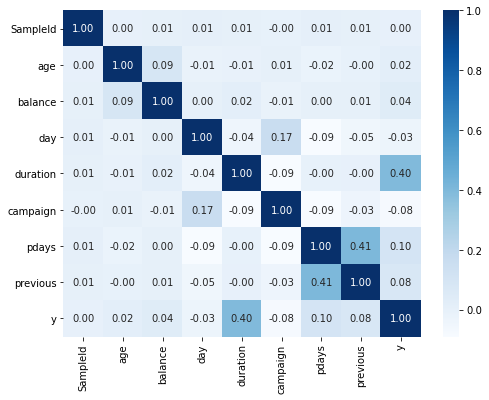

In [7]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_train.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

## 1.2 Target Label<a id="1.2"></a>

In [9]:
df_train['y'].value_counts()

False    19918
True      2687
Name: y, dtype: int64

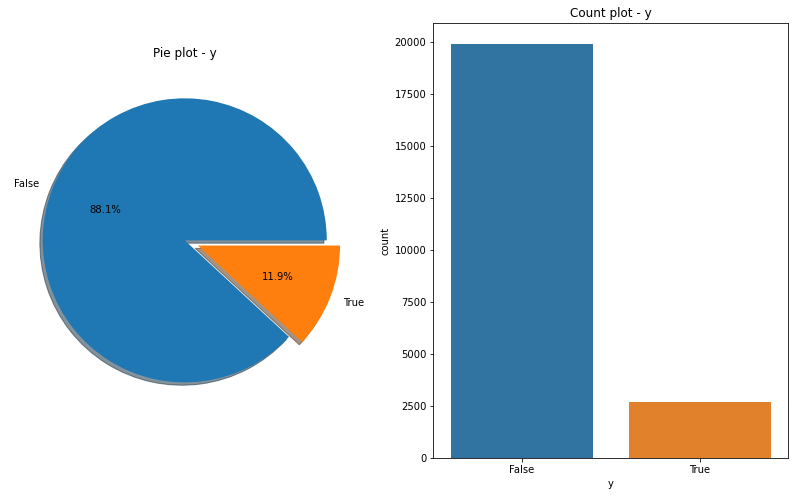

In [10]:
f, ax = plt.subplots(1, 2, figsize = (14, 8))

df_train['y'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - y')
ax[0].set_ylabel('')
sns.countplot('y', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - y')

plt.show()

# 2. Exploratory Data Analysis (EDA)<a id="2"></a> 

In [11]:
# unique 확인
def check_unique(): 
    colname = list(df_train.columns)
    for i in colname:
        print('<<{}>>\n'.format(i), df_train[i].unique())#[:10])
       # if i == 'education':
       #     break

In [12]:
# 결측치 확인
def check_na(): 
    colname = list(df_train.columns)
    for i in colname:
        print("[{}]".format(i), df_train[i].isna().sum())

In [13]:
# 각 변수별 unknown 확인
def check_unknown():
    colname = list(df_train.columns)
    for i in colname:
        print("[{}]".format(i), df_train[i].isin(['unknown']).sum())

In [14]:
check_unique()

<<SampleId>>
 [    0     1     2 ... 22602 22603 22604]
<<age>>
 [57 31 58 32 54 37 44 48 50 59 40 43 34 36 56 45 30 51 81 42 33 26 35 55
 29 46 47 38 41 28 27 74 49 25 52 39 53 65 77 82 61 60 24 92 67 66 64 71
 69 20 23 73 62 21 80 22 72 76 19 79 70 86 18 63 83 78 84 68 95 75 90 85
 93 87]
<<job>>
 ['unemployed' 'services' 'retired' 'technician' 'entrepreneur'
 'management' 'blue-collar' 'self-employed' 'admin.' 'housemaid' 'student'
 'unknown']
<<marital>>
 ['married' 'single' 'divorced']
<<education>>
 ['secondary' 'tertiary' 'unknown' 'primary']
<<default>>
 ['no' 'yes']
<<balance>>
 [2299  246 1230 ... 2063 3303 3684]
<<housing>>
 ['no' 'yes']
<<loan>>
 ['no' 'yes']
<<contact>>
 ['cellular' 'unknown' 'telephone']
<<day>>
 [12 16 20 29 15 22 27  8  3 13 30 24 26  4 31 28 11 21  5 19 17 18 14  6
  7 23 10  9  1  2 25]
<<month>>
 ['nov' 'may' 'jan' 'jul' 'aug' 'jun' 'mar' 'apr' 'feb' 'oct' 'sep' 'dec']
<<duration>>
 [  39  230  420 ... 1745 2187 1061]
<<campaign>>
 [ 3  2  1  4  7 27

In [15]:
check_na()

[SampleId] 0
[age] 0
[job] 0
[marital] 0
[education] 0
[default] 0
[balance] 0
[housing] 0
[loan] 0
[contact] 0
[day] 0
[month] 0
[duration] 0
[campaign] 0
[pdays] 0
[previous] 0
[poutcome] 0
[y] 0


In [16]:
check_unknown()

[SampleId] 0
[age] 0
[job] 141
[marital] 0
[education] 955
[default] 0
[balance] 0
[housing] 0
[loan] 0
[contact] 6423
[day] 0
[month] 0
[duration] 0
[campaign] 0
[pdays] 0
[previous] 0
[poutcome] 18472
[y] 0


In [17]:
df_train['job'].value_counts()

blue-collar      4874
management       4727
technician       3750
admin.           2585
services         2131
retired          1145
self-employed     782
entrepreneur      732
unemployed        633
housemaid         613
student           492
unknown           141
Name: job, dtype: int64

In [18]:
df_train['education'].value_counts()

secondary    11518
tertiary      6675
primary       3457
unknown        955
Name: education, dtype: int64

### 2.1 [age]<a id="2.1"></a> 

In [19]:
df_train.loc[df_train['y']]

,SampleId,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,2,58,retired,married,secondary,no,1230,no,no,cellular,20,may,420,1,87,1,failure,True
5,5,37,services,married,secondary,no,1543,yes,no,cellular,22,may,298,1,10,6,failure,True
10,10,59,management,married,tertiary,no,296,no,yes,cellular,15,jul,805,3,-1,0,unknown,True
23,23,81,retired,married,primary,no,5220,no,no,telephone,13,nov,135,1,94,2,other,True
26,26,26,admin.,single,secondary,no,96,no,no,cellular,11,aug,349,1,70,3,failure,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22559,22559,28,management,single,tertiary,no,5474,no,no,cellular,28,jul,486,5,-1,0,unknown,True
22560,22560,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,feb,406,2,92,2,success,True
22567,22567,42,services,married,secondary,no,1376,yes,no,cellular,2,jun,271,2,92,4,success,True
22574,22574,76,management,married,unknown,no,1780,yes,no,telephone,23,apr,413,3,-1,0,unknown,True


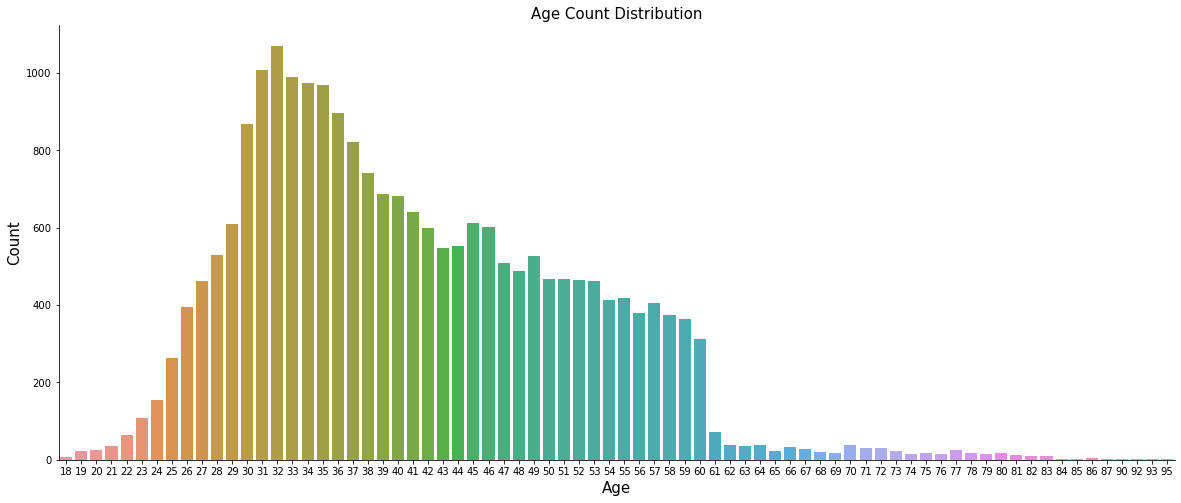

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df_train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

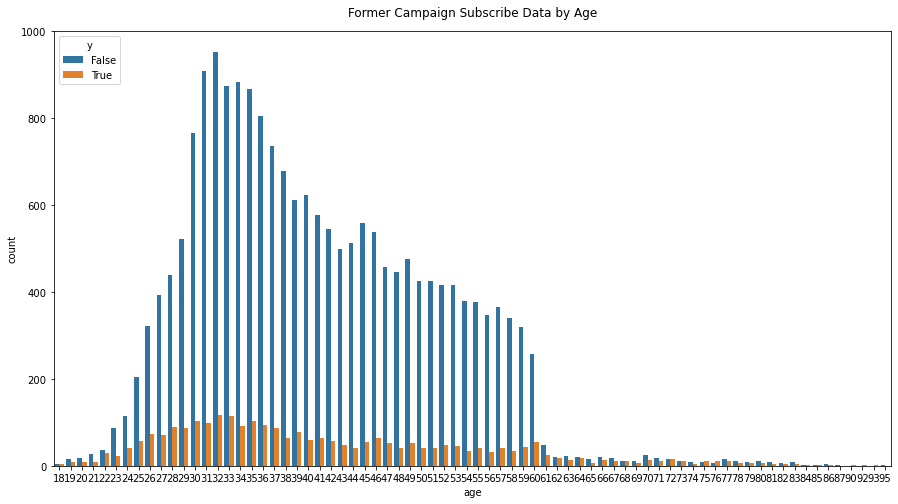

In [21]:
y_position = 1.02
plt.figure(figsize = (15, 8))
sns.countplot('age', hue = 'y', data = df_train)
plt.title('Former Campaign Subscribe Data by Age', y = y_position)
plt.show()

In [69]:
# 연령대 변수('age_group') 생성 10대 단위
df_train['age_group'] = df_train['age'].apply(lambda x : 0 if x < 10 else 
                                              (10 if x < 20 else
                                              (20 if x < 30 else
                                              (30 if x < 40 else
                                              (40 if x < 50 else
                                              (50 if x < 60 else
                                              (60 if x < 70 else
                                              (70 if x < 80 else
                                              (80 if x < 90 else
                                              (90 if x < 100 else 100))))))))))

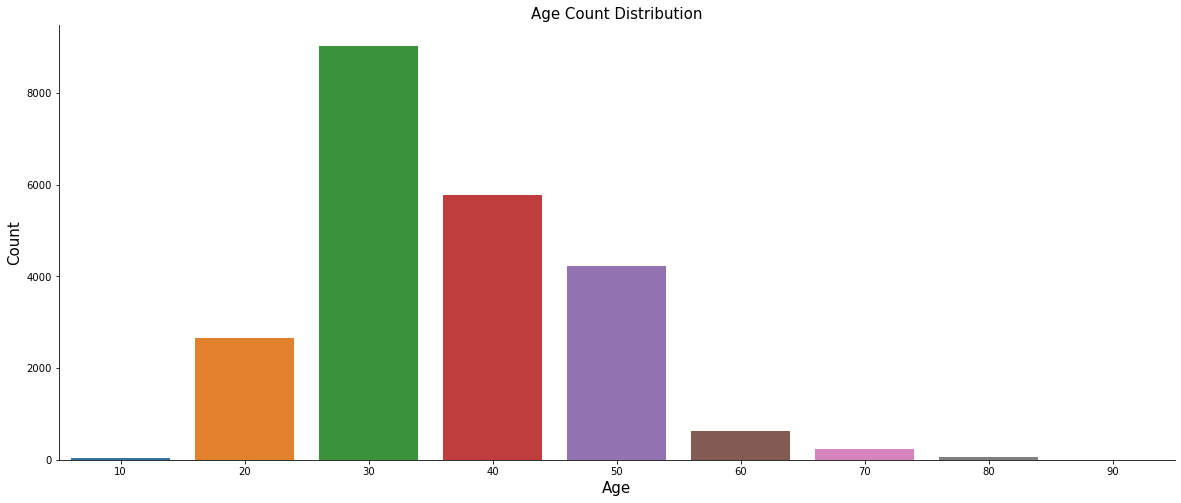

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age_group', data = df_train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

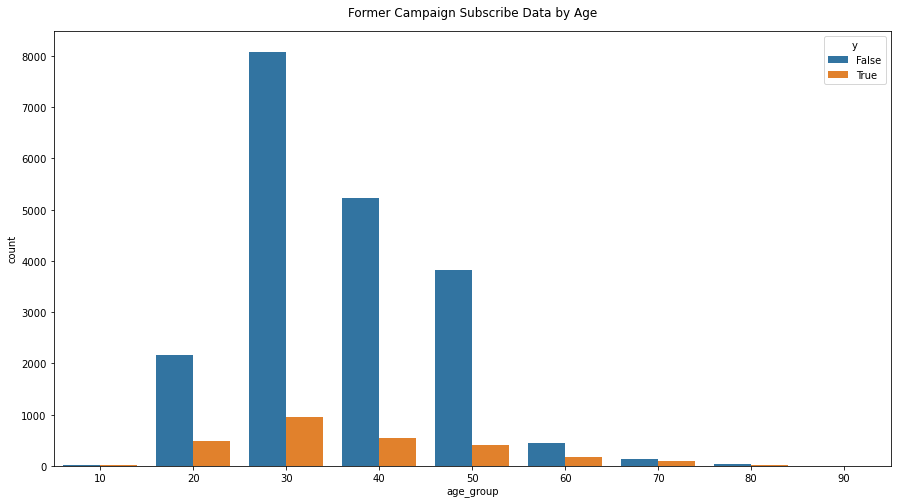

In [24]:
plt.figure(figsize = (15, 8))
sns.countplot('age_group', hue = 'y', data = df_train)
plt.title('Former Campaign Subscribe Data by Age', y = y_position)
plt.show()

(0.0, 75000.0)

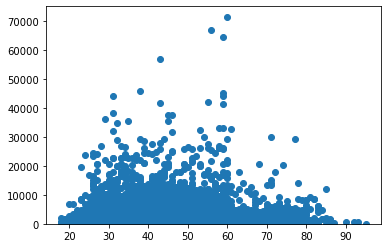

In [25]:
# 연령별 연 평균 잔고액
plt.scatter(df_train.age, df_train.balance)
plt.ylim(0, 75000)

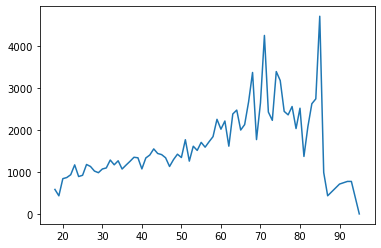

In [26]:
# 연령별 연 평균 잔고액 평균
plt.plot(df_train.groupby('age').mean().sort_values(by = 'age')['balance'])
plt.show()

### 2.2 [job]<a id="2.2"></a> 

In [27]:
job_by_balance = df_train.groupby('job').mean().sort_values(by = 'balance')['balance']

In [28]:
job_idx = job_by_balance.index

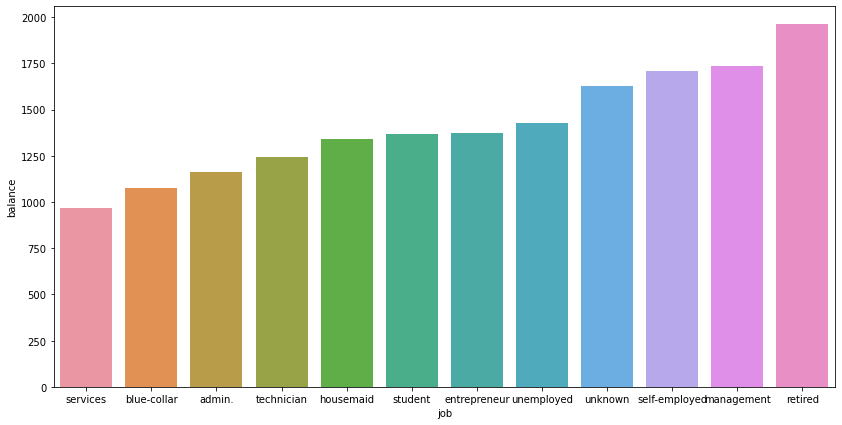

In [29]:
# 직군별 연 평균 잔고액 평균
plt.figure(figsize = (14, 7))
sns.barplot(job_idx, job_by_balance)
#plt.legend()
plt.show()

In [30]:
df_train.groupby('job').mean().sort_values(by = 'y')

,SampleId,age,balance,day,duration,campaign,pdays,previous,y,age_group
job,,,,,,,,,,
blue-collar,11264.101354,40.037751,1073.429216,15.501436,268.972097,2.832786,44.875667,0.537751,0.077554,35.506771
entrepreneur,11584.486339,41.987705,1375.293716,15.752732,258.889344,2.762295,35.428962,0.435792,0.080601,37.527322
housemaid,11595.024470,46.419250,1339.468189,15.553018,244.347471,2.815661,20.897227,0.360522,0.088091,41.810767
services,11186.431722,38.817926,965.595964,15.501642,258.871891,2.716565,40.251056,0.477241,0.097607,34.382919
technician,11347.222933,39.342400,1241.138667,16.469867,249.406400,2.870400,34.228000,0.556533,0.110400,35.010667
unknown,10993.723404,46.645390,1624.539007,14.787234,233.453901,3.503546,21.716312,0.354610,0.120567,41.489362
admin.,11360.765571,39.333462,1159.947776,15.544681,248.455706,2.670406,50.113346,0.710251,0.122244,34.823985
self-employed,11245.310742,40.469309,1705.635550,15.632992,266.957801,2.822251,36.200767,0.571611,0.122762,35.869565
management,11283.450391,40.405543,1736.757563,16.235667,251.261054,2.918130,38.668500,0.643114,0.134546,36.069389


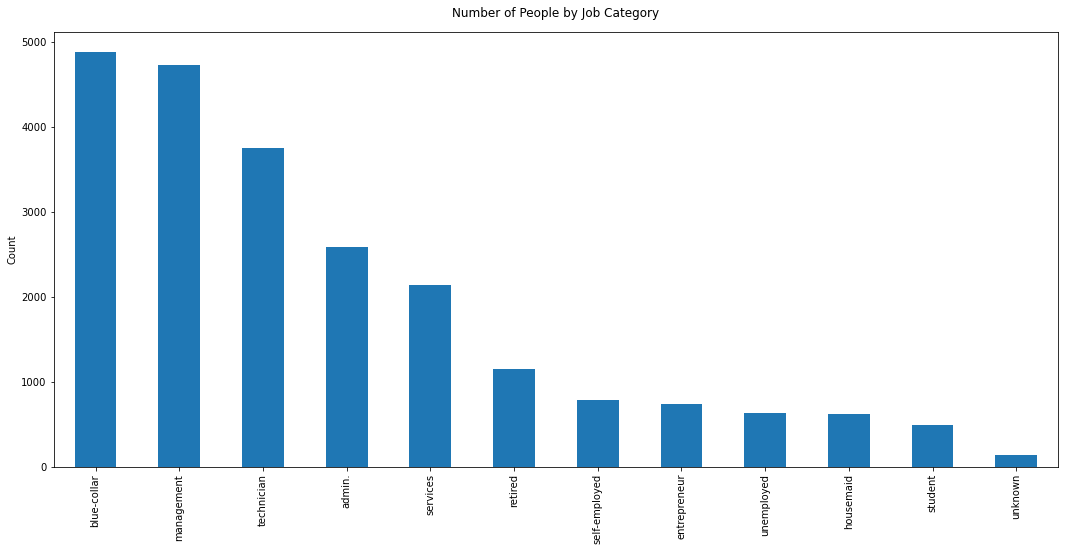

In [31]:
from matplotlib import gridspec

y_position = 1.02
plt.figure(figsize = (18, 8))
df_train['job'].value_counts().plot.bar()
plt.title('Number of People by Job Category', y = y_position)
plt.ylabel('Count')
plt.show()


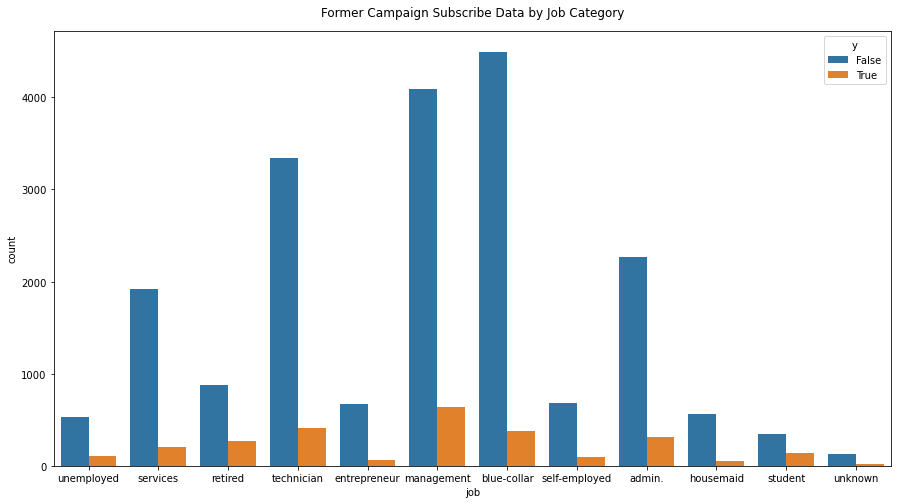

In [32]:
plt.figure(figsize = (15, 8))
sns.countplot('job', hue = 'y', data = df_train)
plt.title('Former Campaign Subscribe Data by Job Category', y = y_position)
plt.show()

In [33]:
# ['job'] 변수 unknown 개수
df_train['job'].isin(['unknown']).sum()

141

### 2.3 [marital]<a id="2.3"></a> 

In [34]:
df_train.groupby('job').max()

,SampleId,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
job,,,,,,,,,,,,,,,,,,
admin.,22601,72,single,unknown,yes,64343,yes,yes,unknown,31,sep,3183,36,690,32,unknown,True,70
blue-collar,22593,75,single,unknown,yes,29184,yes,yes,unknown,31,sep,3366,50,782,58,unknown,True,70
entrepreneur,22505,71,single,unknown,yes,41923,yes,yes,unknown,31,sep,2769,24,557,10,unknown,True,70
housemaid,22591,83,single,unknown,yes,45141,yes,yes,unknown,31,sep,1461,23,842,18,unknown,True,80
management,22595,81,single,unknown,yes,102127,yes,yes,unknown,31,sep,2770,63,854,275,unknown,True,80
retired,22603,95,single,unknown,yes,71188,yes,yes,unknown,31,sep,2187,29,792,17,unknown,True,90
self-employed,22553,76,single,unknown,yes,35589,yes,yes,unknown,31,sep,3322,28,585,17,unknown,True,70
services,22604,60,single,unknown,yes,29312,yes,yes,unknown,31,sep,3785,34,761,23,unknown,True,60
student,22538,48,single,unknown,yes,24025,yes,yes,unknown,31,sep,2429,26,535,37,unknown,True,40


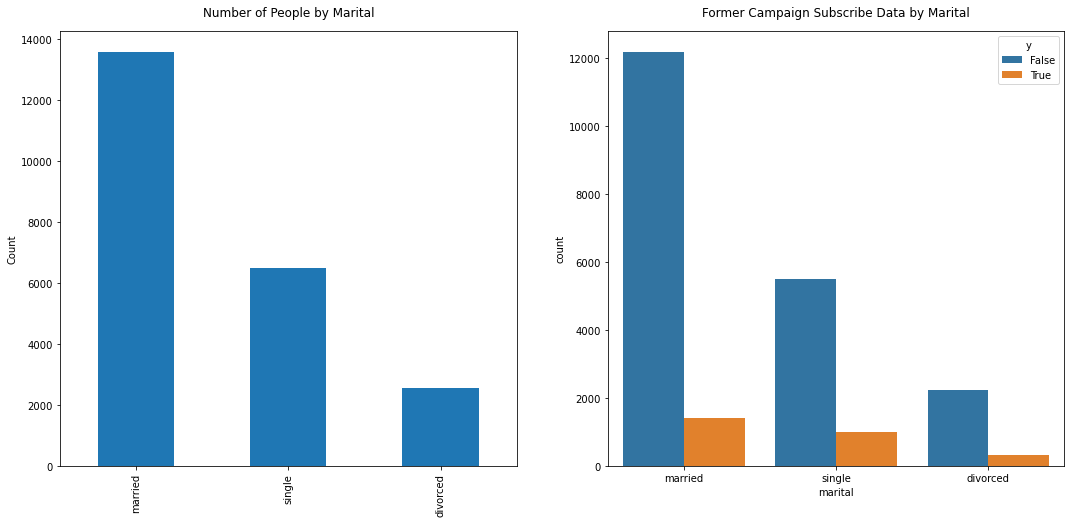

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['marital'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of People by Marital', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('marital', hue = 'y', data = df_train, ax = ax[1])
ax[1].set_title('Former Campaign Subscribe Data by Marital', y = y_position)
plt.show()

### 2.4 [education]<a id="2.4"></a> 

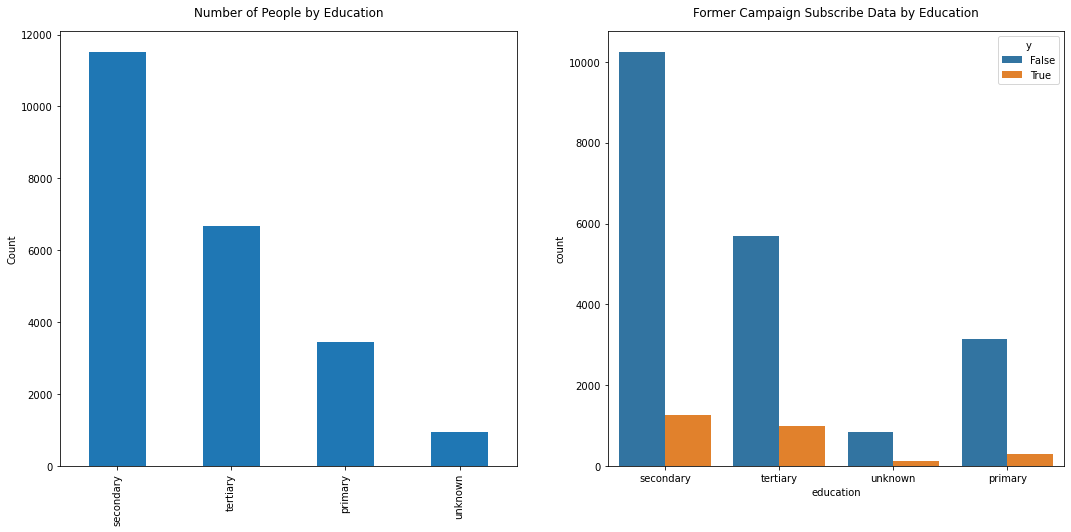

In [36]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['education'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of People by Education', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('education', hue = 'y', data = df_train, ax = ax[1])
ax[1].set_title('Former Campaign Subscribe Data by Education', y = y_position)
plt.show()

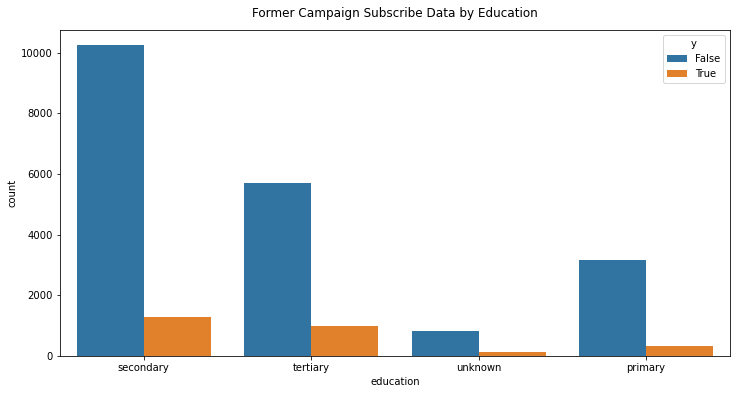

In [37]:
plt.figure(figsize = (12, 6))
sns.countplot('education', hue = 'y', data = df_train)
plt.title('Former Campaign Subscribe Data by Education', y = y_position)
plt.show()

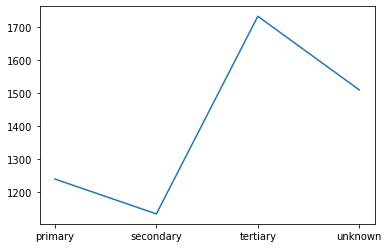

In [38]:
# 학력군별 연 평균 잔고액 평균
plt.plot(df_train.groupby('education').mean()['balance'])
plt.show()

### 2.5 [default]<a id="2.5"></a> 

### 2.6 [balance]<a id="2.6"></a> 

In [49]:
# 정규화
from sklearn.preprocessing import StandardScaler
st = ['balance']
stand = StandardScaler()
for i in st:
    tt=stand.fit(df_train[st])
    e=tt.transform(df_train[st])
    df_train[st] = e

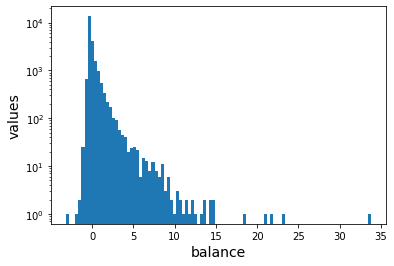

In [40]:
balance = pd.DataFrame(df_train['balance'].value_counts())
balance['values'] = balance.index
balance.reset_index(drop = True)
# balance 분포 시각화
import matplotlib.pyplot as plt
plt.hist(df_train.balance, 100, log = True)
"""plt.plot('balance',  # x

         'values',  # y

         data= balance,  

         marker='o', 

         markersize=3,

         color='blue')"""

plt.title('', fontsize=20)

plt.xlabel('balance', fontsize=14)

plt.ylabel('values', fontsize=14)


plt.show()

In [41]:
len(df_train.loc[(df_train['balance'] == 0)&(df_train['y'] == 0)])

0

In [42]:
len(df_train.loc[(df_train['balance'] == 0)&(df_train['y'] == 1)])

0

In [43]:
len(df_train.loc[(df_train['balance'] != 0)&(df_train['y'] == 1)])

2687

In [44]:
len(df_train.loc[(df_train['balance'] != 0)&(df_train['y'] == 0)])

19918

### 2.7 [housing]<a id="2.7"></a> 

### 2.8 [loan]<a id="2.8"></a> 

### 2.9 [contact]<a id="2.9"></a> 

In [45]:
df_train.groupby('contact').count().y

contact
cellular     14722
telephone     1460
unknown       6423
Name: y, dtype: int64

In [46]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

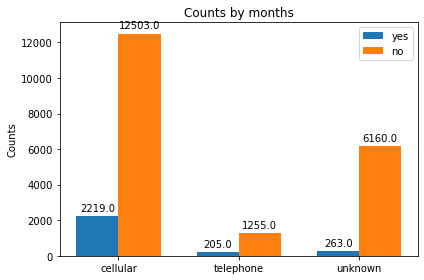

In [47]:
labels_contact=df_train.contact.unique()
labels_contact.sort()
df_contact_total = df_train.groupby('contact').count().y
df_contact_y = df_train.groupby('contact').sum().y
df_contact_no = df_contact_total - df_contact_y

x = np.arange(len(labels_contact))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_contact_y, width, label='yes')
rects2 = ax.bar(x + width/2, df_contact_no, width, label='no')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by months')
ax.set_xticks(x)
ax.set_xticklabels(labels_contact)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

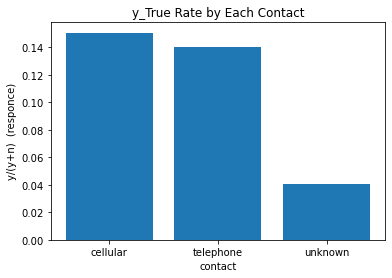

In [48]:
tmp1_contact=df_train.groupby('contact').count().y.astype('int')
tmp2_contact=df_train.groupby('contact').sum().y.astype('int')
tmp3_contact=tmp2_contact/tmp1_contact

#print(pd.DataFrame(tmp1,),'\n')
#print(pd.DataFrame(tmp2),'\n')
#print(pd.DataFrame(tmp3),'\n')

plt.bar(df_train.groupby('contact').count().index,tmp3_contact)
plt.xlabel('contact')
plt.ylabel('y/(y+n)  (responce)')
plt.title('y_True Rate by Each Contact')
plt.show()

### 2.10 [day]<a id="2.10"></a>

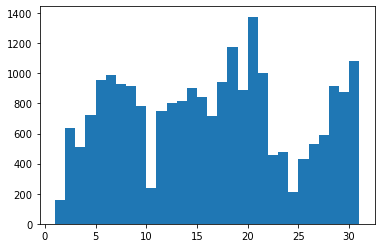

In [49]:
plt.hist(df_train.day, 30)
plt.show()

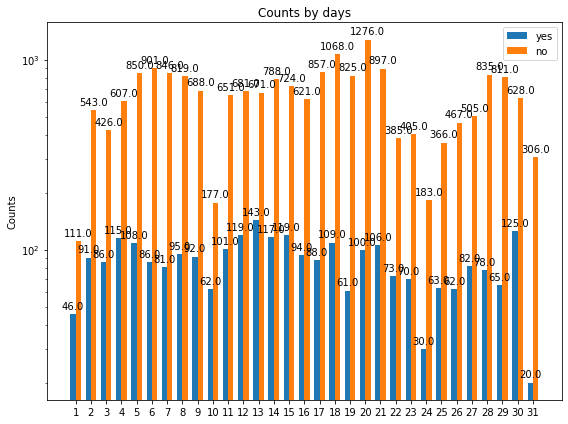

In [50]:
labels_day=df_train.day.unique()
labels_day.sort()
df_day_total = df_train.groupby('day').count().y
df_day_y = df_train.groupby('day').sum().y
df_day_no = df_day_total - df_day_y

x = np.arange(len(labels_day))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (8, 6))
rects1 = ax.bar(x - width/2, df_day_y, width, label='yes', log=True)
rects2 = ax.bar(x + width/2, df_day_no, width, label='no', log=True)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by days')
ax.set_xticks(x)
ax.set_xticklabels(labels_day)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
# 월초에 전화 횟수를 높히자

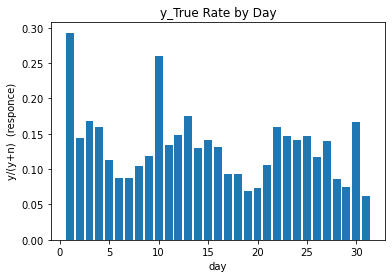

In [51]:
tmp1_day=df_train.groupby('day').count().y.astype('int')
tmp2_day=df_train.groupby('day').sum().y.astype('int')
tmp3_day=tmp2_day/tmp1_day

#print(pd.DataFrame(tmp1,),'\n')
#print(pd.DataFrame(tmp2),'\n')
#print(pd.DataFrame(tmp3),'\n')

plt.bar(df_train.groupby('day').count().index,tmp3_day)
plt.title('y_True Rate by Day')
plt.xlabel('day')
plt.ylabel('y/(y+n)  (responce)')
plt.show()

### 2.11[month]<a id="2.11"></a>

In [70]:
df_train.loc[df_train.month=='jan','month']=1
df_train.loc[df_train.month=='feb','month']=2
df_train.loc[df_train.month=='mar','month']=3
df_train.loc[df_train.month=='apr','month']=4
df_train.loc[df_train.month=='may','month']=5
df_train.loc[df_train.month=='jun','month']=6
df_train.loc[df_train.month=='jul','month']=7
df_train.loc[df_train.month=='aug','month']=8
df_train.loc[df_train.month=='sep','month']=9
df_train.loc[df_train.month=='oct','month']=10
df_train.loc[df_train.month=='nov','month']=11
df_train.loc[df_train.month=='dec','month']=12
df_train

,SampleId,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group
0,22605,61,housemaid,married,primary,no,848,no,no,cellular,27,4,605,1,187,1,other,60
1,22606,44,housemaid,married,primary,no,0,no,no,cellular,20,8,174,5,-1,0,unknown,40
2,22607,54,admin.,married,secondary,no,602,no,no,cellular,3,3,143,2,-1,0,unknown,50
3,22608,28,technician,single,secondary,no,799,yes,no,cellular,25,7,295,1,-1,0,unknown,20
4,22609,52,technician,married,unknown,no,425,yes,no,cellular,28,1,219,2,254,3,failure,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,45206,59,retired,married,secondary,no,2291,no,yes,cellular,14,7,127,3,-1,0,unknown,50
22602,45207,38,unemployed,married,secondary,no,0,no,no,cellular,24,7,168,2,-1,0,unknown,30
22603,45208,34,unemployed,married,tertiary,no,582,yes,no,cellular,9,2,189,3,-1,0,unknown,30
22604,45209,42,management,divorced,tertiary,no,1622,yes,no,cellular,12,8,158,2,-1,0,unknown,40


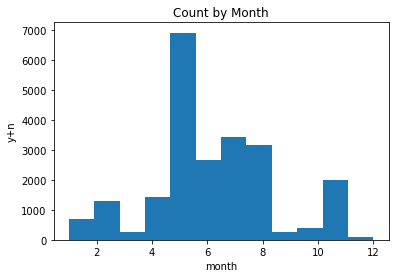

In [53]:
plt.hist(df_train.month,12)
plt.xlabel('month')
plt.ylabel('y+n')
plt.title('Count by Month')
plt.show()

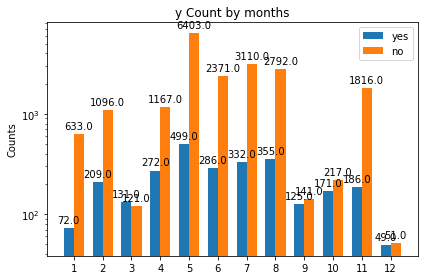

In [54]:
labels_month=df_train.month.unique()
labels_month.sort()
df_month_total = df_train.groupby('month').count().y
df_month_y = df_train.groupby('month').sum().y
df_month_no = df_month_total - df_month_y

x = np.arange(len(labels_month))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_month_y, width, label='yes', log=True)
rects2 = ax.bar(x + width/2, df_month_no, width, label='no', log=True)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('y Count by months')
ax.set_xticks(x)
ax.set_xticklabels(labels_month)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

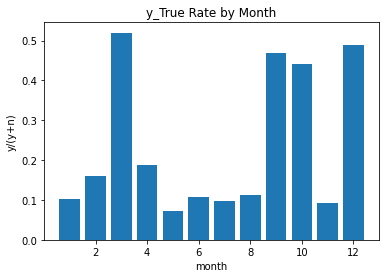

In [55]:
tmp1_month=df_train.groupby('month').count().y.astype('int')
tmp2_month=df_train.groupby('month').sum().y.astype('int')
tmp3_month=tmp2_month/tmp1_month

#print(pd.DataFrame(tmp1,),'\n')
#print(pd.DataFrame(tmp2),'\n')
#print(pd.DataFrame(tmp3),'\n')

plt.bar(df_train.groupby('month').count().index,tmp3_month)
plt.xlabel('month')
plt.ylabel('y/(y+n)')
plt.title('y_True Rate by Month')
plt.show()

### 2.13 [campaign]<a id="2.13"></a> 

In [9]:
df1 = pd.get_dummies(df_train['y'], prefix = 'y' ,drop_first=False)

In [10]:
df_train = pd.concat([df_train, df1], axis=1 )

In [58]:
# 컨택횟수의 분포.

df_train['campaign'].value_counts()

1     8782
2     6162
3     2762
4     1807
5      874
6      665
7      401
8      251
9      161
10     133
11     109
12      79
13      68
14      44
16      42
15      38
19      29
17      28
18      23
21      18
20      17
22      13
24      12
23      11
26      10
25       9
31       9
27       8
29       7
30       7
32       4
28       4
34       3
50       2
43       2
35       2
38       2
33       2
39       1
37       1
44       1
36       1
63       1
Name: campaign, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

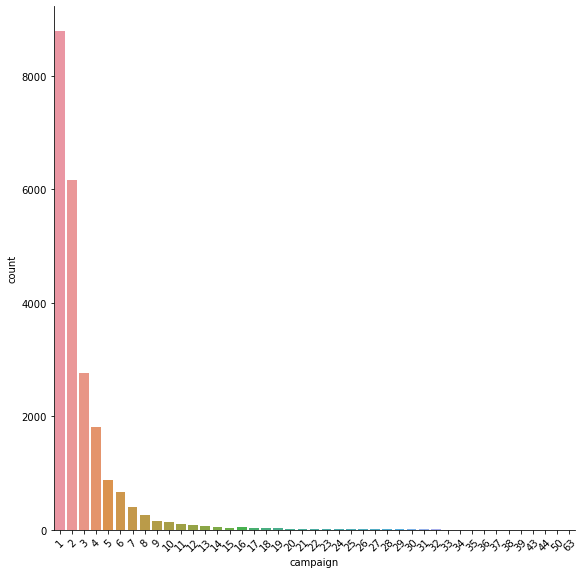

In [59]:
# 컨택횟수의 분포에 대한 시각화로 빈도수 1~3이 높음.

sns.catplot('campaign', kind = 'count', data = df_train, height = 8)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

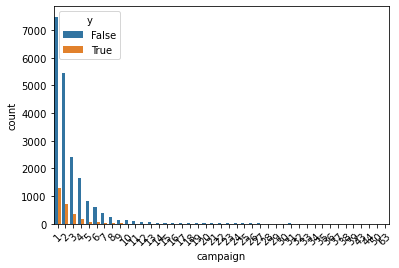

In [60]:
# 컨택횟수의 분포별 예금상품가입여부 비교

sns.countplot('campaign', hue = 'y', data = df_train)
plt.rcParams['figure.figsize'] = [14, 8] # [width, height] (inches)
plt.xticks(rotation = 45)

# 컨택횟수가 10번을 넘어가면서부터 예금상품가입고객수가 현저히 떨어짐. 
# 불균형데이터 특성상 이를 시각화하여 보기 어렵기 때문에 Pandas의 cut함수를 이용하여 데이터프레임으로 나타에서 수치적으로 보기.

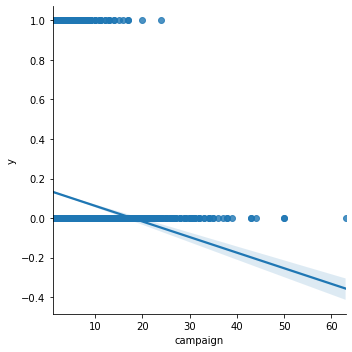

In [61]:
# 컨택수가 증가할수록 예금상품미가입(0) 추세가 강해짐.

sns.lmplot('campaign', 'y', data = df_train)

In [62]:
# 컨택횟수 구간 1~4번 까지의 예금상품가입율

(1991+336+169) / 2687

0.9289170078154075

In [63]:
# 동일한 구간으로 나누어 각 구간의 평균

df_train['camBand'] = pd.cut(df_train['campaign'], 62)
df_train[['camBand', 'y_True']].groupby(['camBand'], as_index=False).sum().sort_values(by='camBand', ascending=True)

# 컨택횟수가 1~4번까지 (1991+336+169) / 2687 = 0.9289....  약 93%의 예금상품가입율을 보임.
# 컨택횟수가 11번 넘어가면서 부터 상품가입횟수 현저히 떨어짐.

,camBand,y_True
0,"(0.938, 2.0]",1991.0
1,"(2.0, 3.0]",336.0
2,"(3.0, 4.0]",169.0
3,"(4.0, 5.0]",66.0
4,"(5.0, 6.0]",46.0
5,"(6.0, 7.0]",26.0
6,"(7.0, 8.0]",12.0
7,"(8.0, 9.0]",17.0
8,"(9.0, 10.0]",4.0
9,"(10.0, 11.0]",7.0


In [64]:
df_train.drop(['camBand'], axis = 1, inplace = True)

### 2.14 [pday]<a id="2.14"></a>  

## pdays 변수 전처리

In [65]:
# 약 18000명의 고객(-1) 은 첫통화.

df_train['pdays'].value_counts()

-1      18471
 182       85
 92        73
 183       65
 91        58
 181       57
 370       49
 184       47
 343       42
 175       42
 95        42
 350       41
 189       36
 174       36
 364       33
 188       31
 97        31
 185       31
 90        29
 186       29
 345       29
 190       29
 368       28
 99        28
 347       28
 94        27
 349       27
 98        27
 357       27
 104       26
 367       26
 178       25
 150       25
 363       24
 196       24
 105       24
 365       24
 344       23
 179       23
 351       23
 342       23
 96        23
 87        22
 195       22
 170       22
 346       21
 93        21
 360       21
 356       21
 167       20
 180       20
 88        20
 265       20
 259       20
 168       20
 176       20
 355       19
 371       19
 352       19
 326       19
 187       19
 119       19
 359       18
 366       18
 337       18
 192       18
 335       17
 172       17
 169       17
 2         17
 154       17
 267  

In [66]:
# pdays가 -1 (최근통화 x)이면서 예금상품가입한 인원은 1726명으로 대부분을 차지.

df_train['y_True'].loc[df_train['pdays'] == -1][df_train['y_True'] == 1].count()

1726

In [67]:
# 예금상품가입고객에서 차지하는 비율은 약 64%

1726/2687

0.6423520655005582

In [68]:
# 동일한 구간으로 나누어 각 구간의 합.(예금상품가입고객수)

df_train['pdaysBand'] = pd.cut(df_train['pdays'], 300)
df_train[['pdaysBand', 'y_True']].groupby(['pdaysBand'], as_index=False).sum().sort_values(by='pdaysBand', ascending=True)

# 최근통화x인 경우 -1번 (1726) / 2687 = 0.6423....  약 64%의 예금상품가입율을 보임.

# 84 - 107일 사이인 경우 (26+33+95+37+35+21+9+15) / 2687 = 0.100... 약 10%의 예금상품가입율을 보임.
# 175 - 190일 사이인 경우 (12+55+95+20+12+18+16+12) / 2687 = 0.0893... 약 8%의 예금상품가입율을 보임.

# 따라서 구간 -1, 0 - 84, 85 - 107, 107 - 174, 175 - 190, 191 - 854(끝) 6구간으로 나눔. 

,pdaysBand,y_True
0,"(-1.855, 1.85]",1730.0
1,"(1.85, 4.7]",1.0
2,"(4.7, 7.55]",0.0
3,"(7.55, 10.4]",4.0
4,"(10.4, 13.25]",1.0
5,"(13.25, 16.1]",1.0
6,"(16.1, 18.95]",1.0
7,"(18.95, 21.8]",1.0
8,"(21.8, 24.65]",1.0
9,"(24.65, 27.5]",1.0


In [69]:
# 84 - 107일 사이인 경우 (26+33+95+37+35+21+9+15) / 2687 = 0.100... 약 10%의 예금상품가입율을 보임.
# 175 - 190일 사이인 경우 (12+55+95+20+12+18+16+12) / 2687 = 0.0893... 약 8%의 예금상품가입율을 보임.

print((12+55+95+20+12+18+16+12)/2687,(26+33+95+37+35+21+9+15) / 2687)

0.0893189430591738 0.10085597320431708


### 2.15 [previous]<a id="2.15"></a>

In [70]:
# 전처리후 필요없는 변수제거

df_train.drop(['pdaysBand'], axis = 1, inplace = True)

In [71]:
df_train.head()

,SampleId,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,y_False,y_True
0,0,57,unemployed,married,secondary,no,0.319983,no,no,cellular,12,11,39,3,-1,0,unknown,False,50,1,0
1,1,31,services,married,secondary,no,-0.367322,yes,no,unknown,16,5,230,2,-1,0,unknown,False,30,1,0
2,2,58,retired,married,secondary,no,-0.037898,no,no,cellular,20,5,420,1,87,1,failure,True,50,0,1
3,3,32,technician,single,tertiary,no,-0.259188,no,yes,cellular,29,1,348,1,-1,0,unknown,False,30,1,0
4,4,54,entrepreneur,married,secondary,no,-0.449679,no,yes,cellular,15,7,209,4,-1,0,unknown,False,50,1,0


### 2.16 [poutcome]<a id="2.16"></a>

## previous 전처리

In [72]:
df_train['previous'].value_counts()

0      18471
1       1399
2       1053
3        564
4        369
5        225
6        137
7        101
8         65
9         38
10        33
11        29
13        25
12        18
15        12
17        10
14         9
16         6
19         6
20         5
18         5
24         4
23         3
22         3
25         2
26         2
21         1
58         1
37         1
275        1
28         1
29         1
41         1
30         1
32         1
55         1
27         1
Name: previous, dtype: int64

In [73]:
# previous = 0 일 때, 예금상품가입고객수

df_train['y_True'].loc[df_train['previous'] == 0][df_train['y_True'] == 1].count()

1726

In [74]:
# previous = 1 일 때, 예금상품가입고객수

df_train['y_True'].loc[df_train['previous'] == 1][df_train['y_True'] == 1].count()

312

In [75]:
# previous = 2 일 때, 예금상품가입고객수

df_train['y_True'].loc[df_train['previous'] == 2][df_train['y_True'] == 1].count()

212

In [76]:
# previous = 3 일 때, 예금상품가입고객수

df_train['y_True'].loc[df_train['previous'] == 3][df_train['y_True'] == 1].count()

141

In [77]:
# previous = 4 일 때, 예금상품가입고객수

df_train['y_True'].loc[df_train['previous'] == 4][df_train['y_True'] == 1].count()

96

In [78]:
# orevious 1 ~ 4 구간 예금상품가입고객비율은 약 92%

print((1726+312+212+141+96)/2687)

0.9255675474506885


In [79]:
# 동일한 구간으로 나누어 각 구간의 합.(예금상품가입고객수)

df_train['previousBand'] = pd.cut(df_train['previous'], 274)
df_train[['previousBand', 'y_True']].groupby(['previousBand'], as_index=False).sum().sort_values(by='previousBand', ascending=True)

# previous 값이 0 ~ 4 일때의 예금상품가입율은 (1726+312+212+141+96)/2687 = 0.9255... 약 92%로 대부분을 차지.

,previousBand,y_True
0,"(-0.275, 1.004]",2038.0
1,"(1.004, 2.007]",212.0
2,"(2.007, 3.011]",141.0
3,"(3.011, 4.015]",96.0
4,"(4.015, 5.018]",51.0
5,"(5.018, 6.022]",44.0
6,"(6.022, 7.026]",26.0
7,"(7.026, 8.029]",21.0
8,"(8.029, 9.033]",12.0
9,"(9.033, 10.036]",15.0


In [80]:
# 전처리후 필요없는 변수제거

df_train.drop(['previousBand'], axis = 1, inplace = True)

## poutcome 전처리

In [81]:
# poutcome이 other인 경우 예금상품가입고객의 수

df_train['y_True'].loc[df_train['poutcome'] == 'other'][df_train['y_True'] == 1].count()

162

In [82]:
# poutcome이 unknown인 경우 예금상품가입고객의 수

df_train['y_True'].loc[df_train['poutcome'] == 'unknown'][df_train['y_True'] == 1].count()

1726

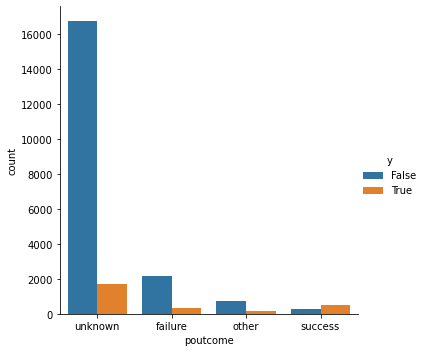

In [83]:
sns.catplot('poutcome', kind = 'count', hue = 'y', data = df_train)

---

- 원핫인코딩 
    - Education, mertariy, contact, job, poutcome, default, housing, loan
- 스케일링
    - age_group, month, day(방법 고민), balance, campaign, pday, previous
- 컬럼 삭제
    - Age(Age_group으로 대체) , y_True(y로 충분?), y_False, SampleID, duration


In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SampleId   22605 non-null  int64  
 1   age        22605 non-null  int64  
 2   job        22605 non-null  object 
 3   marital    22605 non-null  object 
 4   education  22605 non-null  object 
 5   default    22605 non-null  object 
 6   balance    22605 non-null  float64
 7   housing    22605 non-null  object 
 8   loan       22605 non-null  object 
 9   contact    22605 non-null  object 
 10  day        22605 non-null  int64  
 11  month      22605 non-null  object 
 12  duration   22605 non-null  int64  
 13  campaign   22605 non-null  int64  
 14  pdays      22605 non-null  int64  
 15  previous   22605 non-null  int64  
 16  poutcome   22605 non-null  object 
 17  y          22605 non-null  bool   
 18  age_group  22605 non-null  int64  
 19  y_False    22605 non-null  uint8  
 20  y_True

In [253]:
df_train= pd.read_csv('./train.csv')

# 전처리

- 원핫인코딩 
    - Education, mertariy, contact, job, poutcome, default, housing, loan
- 스케일링
    - Min-Max
        
        age_group, month, day
        
    - Standard Scaler
        
        balance, campaign, pday, previous
- 컬럼 삭제
    - Age(Age_group으로 대체) , y_True(y로 충분?), y_False, SampleID, duration


# 이상치 제거 
- balance > 30000
- pdays == 528 (poutcome이 unknown이고, previous가 0이 아닌 값을 가졌기 때문에 결측치로 판단)

일반적인 경우는 pdays -1이 아닌 값을 가지는 경우, 항상 poutcome은 success, fail, other중 하나의 값을 가지면서 previous 값 또한 1 이상의 값을 가진다.
ex) (pdays, previous, poutcome) = (-1, 0, unknown) or (양수, 양수, (success, fail, other))


In [51]:
# ['balance'] >= 30000 index
idx_bal = df_train.loc[df_train['balance'] >= 30000].index
# ['campaign'] >= 35 index
idx_camp = df_train.loc[df_train['campaign'] >= 35].index
# ['previous'] >= 75 index
idx_pre = df_train.loc[df_train['previous'] >= 75].index

In [52]:
df_train.drop(index = 7799, axis = 0, inplace = True)
df_train.drop(index = idx_bal, axis = 0, inplace = True)

In [53]:
df_train.drop(index = idx_camp, axis = 0, inplace = True)
df_train.drop(index = idx_pre, axis = 0, inplace = True)

# 스케일링 - Standard Scaler

In [71]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

standardized = scaler.fit_transform(df_train[['balance', 'campaign', 'pdays', 'previous']])
df_train[['balance', 'campaign', 'pdays', 'previous']] = standardized

# 스케일링 - MinMaxScaler

In [72]:
# 연령대 변수('age_group') 생성 10대 단위
df_train['age_group'] = df_train['age'].apply(lambda x : 0 if x < 10 else 
                                              (10 if x < 20 else
                                              (20 if x < 30 else
                                              (30 if x < 40 else
                                              (40 if x < 50 else
                                              (50 if x < 60 else
                                              (60 if x < 70 else
                                              (70 if x < 80 else
                                              (80 if x < 90 else
                                              (90 if x < 100 else 100))))))))))

In [73]:
df_train.loc[df_train.month=='jan','month']=1
df_train.loc[df_train.month=='feb','month']=2
df_train.loc[df_train.month=='mar','month']=3
df_train.loc[df_train.month=='apr','month']=4
df_train.loc[df_train.month=='may','month']=5
df_train.loc[df_train.month=='jun','month']=6
df_train.loc[df_train.month=='jul','month']=7
df_train.loc[df_train.month=='aug','month']=8
df_train.loc[df_train.month=='sep','month']=9
df_train.loc[df_train.month=='oct','month']=10
df_train.loc[df_train.month=='nov','month']=11
df_train.loc[df_train.month=='dec','month']=12
df_train

,SampleId,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group
0,22605,61,housemaid,married,primary,no,-0.171976,no,no,cellular,27,4,605,-0.569254,1.469857,0.222411,other,60
1,22606,44,housemaid,married,primary,no,-0.445415,no,no,cellular,20,8,174,0.732276,-0.410099,-0.301866,unknown,40
2,22607,54,admin.,married,secondary,no,-0.251299,no,no,cellular,3,3,143,-0.243871,-0.410099,-0.301866,unknown,50
3,22608,28,technician,single,secondary,no,-0.187777,yes,no,cellular,25,7,295,-0.569254,-0.410099,-0.301866,unknown,20
4,22609,52,technician,married,unknown,no,-0.308373,yes,no,cellular,28,1,219,-0.243871,2.139841,1.270964,failure,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,45206,59,retired,married,secondary,no,0.293321,no,yes,cellular,14,7,127,0.081511,-0.410099,-0.301866,unknown,50
22602,45207,38,unemployed,married,secondary,no,-0.445415,no,no,cellular,24,7,168,-0.243871,-0.410099,-0.301866,unknown,30
22603,45208,34,unemployed,married,tertiary,no,-0.257748,yes,no,cellular,9,2,189,0.081511,-0.410099,-0.301866,unknown,30
22604,45209,42,management,divorced,tertiary,no,0.077601,yes,no,cellular,12,8,158,-0.243871,-0.410099,-0.301866,unknown,40


In [74]:
scaler_MM = preprocessing.MinMaxScaler()

scalered_MM = scaler_MM.fit_transform(df_train[['age_group', 'month', 'day']])

df_train[['age_group','month','day']] = scalered_MM

# 원핫인코딩 

In [75]:
columns = ['default','housing','loan', 'education', 'contact', 'job', 'poutcome', 'marital']
for i in columns:
    df1= pd.get_dummies(df_train[i], prefix = i ,drop_first=True)
    df_train=pd.concat([df_train, df1], axis=1)

# 컬럼 드롭 

In [19]:
df_train.columns

Index(['SampleId', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'y_False', 'y_True', 'age_group',
       'default_yes', 'housing_yes', 'loan_yes', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'marital_married', 'marital_single'],
      dtype='object')

In [76]:
df_train.drop(['age', 'SampleId', 'duration'], inplace = True, axis = 1)
df_train.drop(columns, inplace = True, axis = 1)

In [21]:
# df_train.drop(['age', 'y_True', 'y_False', 'SampleId', 'duration'], inplace = True, axis = 1)
# df_train.drop(columns, inplace = True, axis = 1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              22606 non-null  float64
 1   day                  22606 non-null  float64
 2   month                22606 non-null  float64
 3   campaign             22606 non-null  float64
 4   pdays                22606 non-null  float64
 5   previous             22606 non-null  float64
 6   age_group            22606 non-null  float64
 7   default_yes          22606 non-null  uint8  
 8   housing_yes          22606 non-null  uint8  
 9   loan_yes             22606 non-null  uint8  
 10  education_secondary  22606 non-null  uint8  
 11  education_tertiary   22606 non-null  uint8  
 12  education_unknown    22606 non-null  uint8  
 13  contact_telephone    22606 non-null  uint8  
 14  contact_unknown      22606 non-null  uint8  
 15  job_blue-collar      22606 non-null 

---

# 1. import

In [23]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [95]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# df_train 으로 데이터불러오기

In [24]:
y = df_train['y']
y.shape

(22565,)

In [28]:
X = df_train.drop(['y'], axis=1)
X.shape

(22565, 31)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [322]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(18052, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
False    0.881066
True     0.118934
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [30]:
import sklearn.metrics as metrics

In [324]:
# cross_val_score 함수 Score 인자자리에 넣을수있는 인자들.

metrics.SCORERS.keys()



dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## 분류모델 학습하기

In [487]:
# logistic

log_cl =  LogisticRegression(n_jobs = -1)
log_cl.fit(X_train, y_train)
log_cl_pred = log_cl.predict(X_test)

log_cl_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
log_cl_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
log_cl_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for rbf logistic is ', metrics.precision_score(log_cl_pred, y_test))
print('Recall for rbf logistic is ', metrics.recall_score(log_cl_pred, y_test))
print('F1_score for rbf logistic is ', metrics.f1_score(log_cl_pred, y_test))
print()
print('The cross validated precision for logistic is:', log_cl_cv_pre.mean())
print('The cross validated recall for logistic is:', log_cl_cv_rec.mean())
print('The cross validated f1_score for logistic is:', log_cl_cv_f1.mean())

Precision for rbf logistic is  0.6070763500931099
Recall for rbf logistic is  0.22161794697484705
F1_score for rbf logistic is  0.3247011952191235

The cross validated precision for logistic is: 0.7154491882529947
The cross validated recall for logistic is: 0.7251866285068261
The cross validated f1_score for logistic is: 0.7198149325173575


In [31]:
# Random forest

rf_cl = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf_cl.fit(X_train, y_train)
rf_cl_pred = rf_cl.predict(X_test)

rf_cl_cv_pre = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
rf_cl_cv_rec = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
rf_cl_cv_f1 = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for random forest is ', metrics.precision_score(rf_cl_pred, y_test))
print('Recall for random forest is ', metrics.recall_score(rf_cl_pred, y_test))
print('F1_score for random forest is ', metrics.f1_score(rf_cl_pred, y_test))
print()
print('The cross validated precision for random forest is:', rf_cl_cv_pre.mean())
print('The cross validated recall for random forest is:', rf_cl_cv_rec.mean())
print('The cross validated f1_score for random forest is:', rf_cl_cv_f1.mean())

Precision for random forest is  0.22160148975791433
Recall for random forest is  0.6263157894736842
F1_score for random forest is  0.32737276478679506

The cross validated precision for random forest is: 0.5889330072462693
The cross validated recall for random forest is: 0.19610084764181698
The cross validated f1_score for random forest is: 0.28833750631912786


In [489]:
# KNN 군집분석

knn_model=KNeighborsClassifier() 
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

knn_model_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
knn_model_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
knn_model_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for KNN is ', metrics.precision_score(knn_model_pred, y_test))
print('Recall for KNN is ', metrics.recall_score(knn_model_pred, y_test))
print('F1_score for KNN is ', metrics.f1_score(knn_model_pred, y_test))
print()
print('The cross validated precison for KNN is:', knn_model_cv_pre.mean())
print('The cross validated recall for KNN is:', knn_model_cv_rec.mean())
print('The cross validated f1_score for KNN is:', knn_model_cv_f1.mean())

Precision for KNN is  0.5772811918063314
Recall for KNN is  0.22693997071742314
F1_score for KNN is  0.325801366263794

The cross validated precison for KNN is: 0.7154491882529947
The cross validated recall for KNN is: 0.7251866285068261
The cross validated f1_score for KNN is: 0.7198149325173575


In [ ]:
# KNN 하이퍼파라미터에 따른 F1_Score 차이 보기

a_index = list(range(1,6))
a = pd.Series()
x = [0,1,2,3,4,5]
for i in list(range(1,6)):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)
    a=a.append(pd.Series(metrics.f1_score(knn_model_pred, y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [490]:
# Bagged DecisionTree

ba_dt_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100, n_jobs=-1)
ba_dt_model.fit(X_train, y_train)
ba_dt_model_pred = ba_dt_model.predict(X_test)

ba_dt_model_cv_pre = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ba_dt_model_cv_rec = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ba_dt_model_cv_f1 = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Bagged DecisionTree is ', metrics.precision_score(ba_dt_model_pred, y_test))
print('Recall for Bagged DecisionTree is ', metrics.recall_score(ba_dt_model_pred, y_test))
print('F1_score for Bagged DecisionTree is ', metrics.f1_score(ba_dt_model_pred, y_test))
print()
print('The cross validated precision for Bagged DecisionTree is:', ba_dt_model_cv_pre.mean())
print('The cross validated recall for Bagged DecisionTree is:', ba_dt_model_cv_rec.mean())
print('The cross validated f1_score for Bagged DecisionTree is:', ba_dt_model_cv_f1.mean())

Precision for Bagged DecisionTree is  0.3370577281191806
Recall for Bagged DecisionTree is  0.47506561679790027
F1_score for Bagged DecisionTree is  0.39433551198257083

The cross validated precision for Bagged DecisionTree is: 0.944052342690561
The cross validated recall for Bagged DecisionTree is: 0.9066756235392441
The cross validated f1_score for Bagged DecisionTree is: 0.9130519873013527


In [95]:
# AdaBoost (Adaptive boosting)

ada_cl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
ada_cl.fit(X_train, y_train)
ada_cl_pred = ada_cl.predict(X_test)

ada_cl_cv_pre = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ada_cl_cv_rec = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ada_cl_cv_f1 = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for AdaBoost is ', metrics.precision_score(ada_cl_pred, y_test))
print('Recall for rbf AdaBoost is ', metrics.recall_score(ada_cl_pred, y_test))
print('F1_score for rbf AdaBoost is ', metrics.f1_score(ada_cl_pred, y_test))
print()
print('The cross validated precision for AdaBoost is:', ada_cl_cv_pre.mean())
print('The cross validated recall for AdaBoost is:', ada_cl_cv_rec.mean())
print('The cross validated f1_score for AdaBoost is:', ada_cl_cv_f1.mean())

Precision for AdaBoost is  0.14338919925512103
Recall for rbf AdaBoost is  0.6875
F1_score for rbf AdaBoost is  0.23728813559322032

The cross validated precision for AdaBoost is: 0.6774451520602626
The cross validated recall for AdaBoost is: 0.1443990436861552
The cross validated f1_score for AdaBoost is: 0.23703546640335071


In [96]:
# Gradient Boost

gr_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1)
gr_grad.fit(X_train, y_train)
gr_grad_pred = gr_grad.predict(X_test)

gr_grad_cv_pre = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
gr_grad_cv_rec = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
gr_grad_cv_f1 = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Gradient Boost is ', metrics.precision_score(gr_grad_pred, y_test))
print('Recall for Gradient Boost is ', metrics.recall_score(gr_grad_pred, y_test))
print('F1_score for Gradient Boost is ', metrics.f1_score(gr_grad_pred, y_test))
print()
print('The cross validated precision for Gradient Boost is:', gr_grad_cv_pre.mean())
print('The cross validated recall for Gradient Boost is:', gr_grad_cv_rec.mean())
print('The cross validated f1_score for Gradient Boost is:', gr_grad_cv_f1.mean())

Precision for Gradient Boost is  0.2122905027932961
Recall for Gradient Boost is  0.6551724137931034
F1_score for Gradient Boost is  0.32067510548523204

The cross validated precision for Gradient Boost is: 0.6132911874575546
The cross validated recall for Gradient Boost is: 0.20402303846989786
The cross validated f1_score for Gradient Boost is: 0.3052418934139789


In [97]:
# XGBoost

xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1)
xgb_model.fit(X_train,y_train)
xgb_model_pred = xgb_model.predict(X_test)

xgb_model_cv_pre = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
xgb_model_cv_rec = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
xgb_model_cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for XGBoost is ', metrics.precision_score(xgb_model_pred, y_test))
print('Recall for XGBoost is ', metrics.recall_score(xgb_model_pred, y_test))
print('F1_score for XGBoost is ', metrics.f1_score(xgb_model_pred, y_test))
print()
print('The cross validated prediction for XGBoost is:', xgb_model_cv_pre.mean())
print('The cross validated recall for XGBoost is:', xgb_model_cv_rec.mean())
print('The cross validated f1_score for XGBoost is:', xgb_model_cv_f1.mean())

Precision for XGBoost is  0.2309124767225326
Recall for XGBoost is  0.5933014354066986
F1_score for XGBoost is  0.3324396782841823

The cross validated prediction for XGBoost is: 0.5881299867687086
The cross validated recall for XGBoost is: 0.22822647250597697
The cross validated f1_score for XGBoost is: 0.3283415922181029


In [98]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.23277467411545624
Recall for Light GBM is  0.5230125523012552
F1_score for Light GBM is  0.32216494845360827

The cross validated precision for Light GBM is: 0.5596549320673944
The cross validated recall for Light GBM is: 0.25151271462725494
The cross validated f1_score for Light GBM is: 0.34651125382289016


## 모델별 학습결과 데이터프레임

In [336]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

In [337]:
result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Light GBM,0.339378,0.243948,0.557447,0.341011,0.035391,0.555501,0.045388,0.246403,0.029200
XGBoost,0.315789,0.217877,0.573529,0.318402,0.021716,0.576417,0.042283,0.220326,0.017031
Bagged DecisionTree,0.333333,0.236499,0.564444,0.313965,0.034208,0.544985,0.049712,0.220782,0.026595
Gradient Boost,0.283688,0.186220,0.595238,0.311000,0.025804,0.610666,0.049151,0.208692,0.020890
Random forest,0.252149,0.163873,0.546584,0.296047,0.019081,0.598047,0.045176,0.193312,0.020198
Logistic Classifier,0.226994,0.137803,0.643478,0.270232,0.027635,0.664367,0.056161,0.170035,0.019939
knn_model,0.242588,0.167598,0.439024,0.270232,0.027635,0.664367,0.056161,0.170035,0.019939
Adaptive Boost,0.191824,0.113594,0.616162,0.242930,0.027496,0.671592,0.045074,0.148618,0.019463


# 비대칭 데이터 문제(Imbalanced data problem)
- 데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다.

- 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

- 이렇게 각 클래스에 속한 데이터의 갯수의 차이에 의해 발생하는 문제들을 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

# 해결 방법

- 비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링이나 소수 클래스 데이터를 증가시키는 오버 샘플링을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.
-------
- 오버샘플링(Over-Sampling)
- 언더샘플링(Under-Sampling)
- 복합샘플링(Combining Over-and Under-Sampling)

# imbalanced-learn 패키지¶

- imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지

- pip install -U imbalanced-learn

---

# 샘플링 종류별 알고리즘 F1_Score 측정

-----

# 언더 샘플링¶

- RandomUnderSampler : random under-sampling method
- TomekLinks : Tomek’s link method
- CondensedNearestNeighbour : condensed nearest neighbour method
- OneSidedSelection : under-sampling based on one-sided selection method
- EditedNearestNeighbours : edited nearest neighbour method
- NeighbourhoodCleaningRule : neighbourhood cleaning rule
- from imblearn.under_sampling import *

In [338]:
from imblearn.under_sampling import *

### Ramdom Under-Sampler
- 무작위로 데이터를 없애는 단순 샘플링

In [511]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y, random_state = 0)

# 분류학습시 stratify = target으로 설정해야함.

In [512]:
X_train, y_train = RandomUnderSampler().fit_sample(X_train, y_train)

In [513]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4294, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [355]:
results_rand_under = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

In [356]:
result_rand_under = results_rand_under.sort_values(by='F1_CV_Mean', ascending=False)
result_rand_under = result_rand_under.set_index('Model')
display(result_rand_under.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Gradient Boost,0.412128,0.683426,0.295016,0.708679,0.018473,0.760941,0.023192,0.663251,0.032497
XGBoost,0.393514,0.677840,0.277228,0.702208,0.017620,0.747433,0.025005,0.663734,0.033277
Random forest,0.376919,0.662942,0.263314,0.693627,0.027614,0.732557,0.023037,0.656275,0.032942
Bagged DecisionTree,0.374739,0.668529,0.260334,0.685351,0.023625,0.727414,0.022105,0.648355,0.029713
Light GBM,0.365793,0.689013,0.248991,0.684616,0.019934,0.705353,0.014512,0.665597,0.030083
Adaptive Boost,0.360483,0.638734,0.251098,0.683073,0.021885,0.721985,0.022947,0.649759,0.037826
Logistic Classifier,0.328530,0.636872,0.221359,0.666283,0.017486,0.684516,0.016188,0.649746,0.028455
knn_model,0.289868,0.612663,0.189844,0.666283,0.017486,0.684516,0.016188,0.649746,0.028455


### Tomek’s link method

- 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터  (x+,x−) 로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다.
- 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 
- 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [357]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [358]:
X_train, y_train = TomekLinks().fit_sample(X_train, y_train)

In [359]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(17277, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
False    0.875731
True     0.124269
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [368]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Bagged DecisionTree,0.398058,0.305400,0.571429,0.375619,0.040164,0.592883,0.038406,0.276170,0.038912
Light GBM,0.408213,0.314711,0.580756,0.371921,0.029974,0.581450,0.024219,0.274321,0.030761
XGBoost,0.369231,0.268156,0.592593,0.359330,0.042065,0.611121,0.045779,0.256168,0.039626
Gradient Boost,0.363636,0.256983,0.621622,0.351832,0.033002,0.652987,0.042478,0.242658,0.030845
Random forest,0.354628,0.253259,0.591304,0.342835,0.031432,0.663230,0.056288,0.233356,0.032371
Logistic Classifier,0.310791,0.201117,0.683544,0.267035,0.035827,0.708646,0.048872,0.165810,0.027534
knn_model,0.287770,0.223464,0.404040,0.267035,0.035827,0.708646,0.048872,0.165810,0.027534
Adaptive Boost,0.277286,0.175047,0.666667,0.248106,0.025257,0.717846,0.051355,0.150448,0.018076


### Condensed Nearest Neighbour

- CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을  S 라고 하자.

- 소수 클래스 데이터를 모두  S 에 포함시킨다.
- 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면  S 에 포함시킨다.
- 더이상 선택되는 데이터가 없을 때까지 2를 반복한다.
- 이 방법을 사용하면 기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에 다수 데이터의 경우 선택되는 비율이 적어진다.

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [187]:
# X_train, y_train = CondensedNearestNeighbour(n_jobs=-1).fit_sample(X_train, y_train)

In [188]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(6101, 31), 테스트 세트 Shape:(4518, 31)
 학습 세트 레이블 값 분포 비율
False    0.647599
True     0.352401
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881142
True     0.118858
Name: y, dtype: float64


In [198]:
# 1시간 이상 걸림.

# results = pd.DataFrame({
#     'Model': ['Logistic Classifier',
#               'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
#               'Gradient Boost', 'XGBoost', 'Light GBM'],
#     'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
#                  metrics.precision_score(rf_cl_pred, y_test),
#                  metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
#                  metrics.precision_score(knn_model_pred, y_test),
#                  metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
#                  metrics.precision_score(lgbm_clf_pred, y_test)],
#     'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
#                  metrics.recall_score(rf_cl_pred, y_test),
#                  metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
#                  metrics.recall_score(knn_model_pred, y_test),
#                  metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
#                  metrics.recall_score(lgbm_clf_pred, y_test)],
#     'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
#                  metrics.f1_score(rf_cl_pred, y_test),
#                  metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
#                  metrics.f1_score(knn_model_pred, y_test),
#                  metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
#                  metrics.f1_score(lgbm_clf_pred, y_test)],
#     'F1_CV_Mean': [log_cl_cv.mean(), rf_cl_cv.mean(),
#                 ba_dt_model_cv.mean(), ada_cl_cv.mean(), knn_model_cv.mean(),gr_grad_cv.mean(), 
#                 xgb_model_cv.mean(), lgbm_clf_cv.mean()],
#     'F1_CV_std':[log_cl_cv.std(), rf_cl_cv.std(),
#                 ba_dt_model_cv.std(), ada_cl_cv.std(), knn_model_cv.std(), 
#                 gr_grad_cv.std(), 
#                 xgb_model_cv.std(), lgbm_clf_cv.std()]
# })

# result = results.sort_values(by='F1_CV_Mean', ascending=False)
# result = result.set_index('Model')
# display(result.head(13))

,Precision,Recall,F1_Score,F1_CV_Mean,F1_CV_std
Model,,,,,
XGBoost,0.418994,0.455466,0.436469,0.503878,0.021300
Gradient Boost,0.364991,0.475728,0.413066,0.494163,0.026014
Light GBM,0.458101,0.381988,0.416596,0.491366,0.030454
Bagged DecisionTree,0.446927,0.408163,0.426667,0.476984,0.020056
Random forest,0.383613,0.450766,0.414487,0.437399,0.030677
Adaptive Boost,0.240223,0.544304,0.333333,0.368201,0.024671
Logistic Classifier,0.171322,0.567901,0.263233,0.311070,0.044566
knn_model,0.316574,0.287162,0.301151,0.311070,0.044566


### One Sided Selection

- One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 
- 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [370]:
X_train, y_train = OneSidedSelection(random_state=0).fit_sample(X_train, y_train)

In [371]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(17252, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
False    0.875551
True     0.124449
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [380]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Light GBM,0.330808,0.243948,0.513725,0.407487,0.030775,0.604639,0.033609,0.307857,0.029056
Bagged DecisionTree,0.357320,0.268156,0.535316,0.397837,0.025229,0.607754,0.033715,0.296244,0.023235
XGBoost,0.341085,0.245810,0.556962,0.386791,0.033195,0.628687,0.040466,0.279907,0.029580
Gradient Boost,0.296399,0.199255,0.578378,0.364247,0.029940,0.644605,0.039085,0.255225,0.025992
Random forest,0.313673,0.217877,0.559809,0.354706,0.029620,0.655430,0.026003,0.241726,0.026785
Logistic Classifier,0.245827,0.150838,0.663934,0.280326,0.026697,0.706372,0.038973,0.175121,0.019135
knn_model,0.260979,0.193669,0.400000,0.280326,0.026697,0.706372,0.038973,0.175121,0.019135
Adaptive Boost,0.233846,0.141527,0.672566,0.259617,0.024685,0.717393,0.041602,0.158820,0.017545


### Edited Nearest Neighbours

- ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [382]:
X_train, y_train = EditedNearestNeighbours(n_jobs=-1).fit_sample(X_train, y_train)

In [383]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(14134, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
False    0.848097
True     0.151903
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [392]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Light GBM,0.454115,0.446927,0.461538,0.554796,0.025859,0.736446,0.028539,0.445264,0.028539
Bagged DecisionTree,0.424186,0.424581,0.423792,0.551011,0.036867,0.754248,0.043214,0.434553,0.043214
XGBoost,0.458753,0.424581,0.498906,0.548905,0.036360,0.767974,0.036987,0.428024,0.036987
Random forest,0.427300,0.402235,0.455696,0.530710,0.025921,0.812119,0.043485,0.398698,0.043485
Gradient Boost,0.449414,0.392924,0.524876,0.518165,0.026137,0.772898,0.040507,0.390289,0.040507
Logistic Classifier,0.352345,0.258845,0.551587,0.357459,0.035940,0.828392,0.057637,0.228216,0.057637
knn_model,0.374341,0.396648,0.354409,0.357459,0.035940,0.828392,0.057637,0.228216,0.057637
Adaptive Boost,0.338336,0.230912,0.632653,0.335892,0.030890,0.857556,0.041812,0.209122,0.041812


### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [394]:
X_train, y_train = NeighbourhoodCleaningRule(n_jobs=-1).fit_sample(X_train, y_train)

In [395]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(14136, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
False    0.848118
True     0.151882
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [405]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Light GBM,0.436578,0.413408,0.462500,0.525692,0.018397,0.729023,0.030471,0.411739,0.030471
XGBoost,0.454452,0.413408,0.504545,0.524420,0.020409,0.751736,0.030420,0.403351,0.030420
Bagged DecisionTree,0.441506,0.404097,0.486547,0.504806,0.022269,0.716229,0.037505,0.390769,0.037505
Random forest,0.403452,0.348231,0.479487,0.493410,0.034559,0.792042,0.048197,0.369365,0.048197
Gradient Boost,0.415556,0.348231,0.515152,0.480226,0.020747,0.754990,0.037963,0.353045,0.037963
Logistic Classifier,0.305365,0.206704,0.584211,0.332871,0.033060,0.792137,0.044938,0.211004,0.044938
knn_model,0.328042,0.346369,0.311558,0.332871,0.033060,0.792137,0.044938,0.211004,0.044938
Adaptive Boost,0.290749,0.184358,0.687500,0.316194,0.032090,0.836933,0.050901,0.195173,0.050901


# 오버 샘플링¶
- RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique
- BoarderlineSMOTE
- SVMSMOTE

In [88]:
from imblearn.over_sampling import *

### RandomOverSampler
- Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [407]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [543]:
X_train, y_train = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)

In [544]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31810, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [418]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.355609,0.277467,0.495017,0.978985,0.002673,0.957238,0.005448,0.999874,0.005448
Bagged DecisionTree,0.372443,0.322160,0.441327,0.969648,0.003491,0.941217,0.006466,0.999874,0.006466
Light GBM,0.426154,0.515829,0.363041,0.901255,0.007157,0.881489,0.007400,0.921973,0.007400
XGBoost,0.433884,0.586592,0.344262,0.831232,0.007560,0.844444,0.009386,0.818545,0.009386
Gradient Boost,0.423402,0.653631,0.313113,0.748368,0.011068,0.788238,0.011307,0.713294,0.011307
Adaptive Boost,0.360020,0.674115,0.245590,0.692140,0.014385,0.712801,0.015348,0.672805,0.015348
Logistic Classifier,0.332120,0.679702,0.219747,0.680047,0.011070,0.684238,0.011118,0.676011,0.011118
knn_model,0.302312,0.499069,0.216828,0.680047,0.011070,0.684238,0.011118,0.676011,0.011118


### ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [419]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [541]:
X_train, y_train = ADASYN(random_state=0).fit_sample(X_train, y_train)

In [542]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31810, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [430]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.407135,0.361266,0.466346,0.922264,0.084082,0.942465,0.005222,0.914683,0.005222
Bagged DecisionTree,0.381779,0.327747,0.457143,0.900240,0.150151,0.943650,0.009732,0.889618,0.009732
Light GBM,0.347826,0.260708,0.522388,0.886019,0.228908,0.963503,0.010689,0.875643,0.010689
XGBoost,0.338308,0.253259,0.509363,0.878874,0.233290,0.965789,0.007312,0.863273,0.007312
Gradient Boost,0.374118,0.296089,0.507987,0.877809,0.201645,0.956681,0.018014,0.853147,0.018014
Adaptive Boost,0.382802,0.513966,0.304972,0.791325,0.077653,0.820416,0.027754,0.770089,0.027754
Logistic Classifier,0.308064,0.594041,0.207953,0.698496,0.027111,0.690288,0.015835,0.707537,0.015835
knn_model,0.303850,0.543762,0.210830,0.698496,0.027111,0.690288,0.015835,0.707537,0.015835


### SMOTE¶
- SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [518]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [539]:
X_train, y_train = SMOTE(random_state=0).fit_sample(X_train, y_train)

In [540]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31810, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [443]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.392034,0.348231,0.448441,0.929866,0.083475,0.939814,0.005105,0.931010,0.005105
Bagged DecisionTree,0.386389,0.327747,0.470588,0.913769,0.131097,0.943908,0.013164,0.907362,0.013164
Light GBM,0.355932,0.273743,0.508651,0.890490,0.225124,0.961037,0.020864,0.880758,0.020864
XGBoost,0.371638,0.283054,0.540925,0.886096,0.221414,0.961785,0.018562,0.871076,0.018562
Gradient Boost,0.403171,0.331471,0.514451,0.879772,0.193270,0.948020,0.027542,0.857749,0.027542
Adaptive Boost,0.383356,0.523277,0.302476,0.805981,0.068330,0.831995,0.022585,0.786217,0.022585
Logistic Classifier,0.323153,0.610801,0.219692,0.718105,0.031019,0.715651,0.014423,0.721463,0.014423
knn_model,0.306873,0.536313,0.214925,0.718105,0.031019,0.715651,0.014423,0.721463,0.014423


# BoarderlineSMOTE

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [89]:
X_train, y_train = BorderlineSMOTE(random_state=0).fit_sample(X_train, y_train)

In [536]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31810, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [455]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.414097,0.350093,0.506739,0.928846,0.091127,0.940417,0.007190,0.929688,0.007190
Bagged DecisionTree,0.377104,0.312849,0.474576,0.906080,0.145109,0.940094,0.011302,0.901953,0.011302
Light GBM,0.373571,0.273743,0.588000,0.888185,0.226063,0.959320,0.012635,0.881134,0.012635
XGBoost,0.395031,0.296089,0.593284,0.886011,0.220163,0.960248,0.009557,0.874911,0.009557
Gradient Boost,0.418286,0.340782,0.541420,0.881480,0.198224,0.947110,0.019491,0.866112,0.019491
Adaptive Boost,0.389034,0.554935,0.299497,0.818513,0.070927,0.813772,0.026258,0.828342,0.026258
Logistic Classifier,0.332496,0.616387,0.227648,0.749445,0.033866,0.730030,0.016347,0.771136,0.016347
knn_model,0.329525,0.510242,0.243339,0.749445,0.033866,0.730030,0.016347,0.771136,0.016347


### SVMSMOTE

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [537]:
X_train, y_train = SVMSMOTE(random_state=0).fit_sample(X_train, y_train)

In [538]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31810, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [469]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.361582,0.297952,0.459770,0.929431,0.092386,0.947685,0.010410,0.923838,0.010410
Bagged DecisionTree,0.356164,0.290503,0.460177,0.914831,0.126631,0.944661,0.012713,0.907612,0.012713
Light GBM,0.332913,0.245810,0.515625,0.898047,0.201148,0.962185,0.011051,0.887486,0.011051
Gradient Boost,0.373272,0.301676,0.489426,0.896845,0.160494,0.948010,0.020263,0.879879,0.020263
XGBoost,0.345523,0.255121,0.535156,0.896043,0.192694,0.961404,0.011074,0.881009,0.011074
Adaptive Boost,0.412141,0.480447,0.360839,0.828312,0.096364,0.873104,0.020671,0.800341,0.020671
Logistic Classifier,0.349051,0.530726,0.260036,0.774893,0.086094,0.783865,0.027906,0.776009,0.027906
knn_model,0.329545,0.486034,0.249284,0.774893,0.086094,0.783865,0.027906,0.776009,0.027906


# 복합 샘플링¶
- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek
- from imblearn.combine import *

In [42]:
from imblearn.combine import *

### SMOTE+ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [43]:
X_train, y_train = SMOTEENN(random_state=0).fit_sample(X_train, y_train)

In [46]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(24764, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.571232
False    0.428768
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [482]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.439495,0.551210,0.365432,0.964646,0.038635,0.972451,0.003462,0.960647,0.003462
Bagged DecisionTree,0.423403,0.512104,0.360892,0.949382,0.062827,0.962085,0.003355,0.943782,0.003355
Light GBM,0.459596,0.508380,0.419355,0.939106,0.121128,0.977504,0.003248,0.924948,0.003248
XGBoost,0.476844,0.517691,0.441971,0.938104,0.107991,0.975974,0.004298,0.920872,0.004298
Gradient Boost,0.458298,0.506518,0.418462,0.931190,0.104286,0.972721,0.003313,0.909208,0.003313
Adaptive Boost,0.340741,0.685289,0.226741,0.859210,0.031570,0.839946,0.008930,0.881314,0.008930
Logistic Classifier,0.312867,0.744879,0.198020,0.805957,0.014352,0.784443,0.005546,0.828965,0.005546
knn_model,0.298861,0.635009,0.195415,0.805957,0.014352,0.784443,0.005546,0.828965,0.005546


### SMOTE+Tomek¶
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [483]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [484]:
X_train, y_train = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [486]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(31432, 31), 테스트 세트 Shape:(4513, 31)
 학습 세트 레이블 값 분포 비율
True     0.5
False    0.5
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.88101
True     0.11899
Name: y, dtype: float64


In [495]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(),gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()]    
})

result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Random forest,0.416404,0.368715,0.478261,0.930995,0.081342,0.941933,0.006209,0.930976,0.006209
Bagged DecisionTree,0.394336,0.337058,0.475066,0.913052,0.127848,0.944052,0.009007,0.906676,0.009007
XGBoost,0.360406,0.264432,0.565737,0.885790,0.223084,0.963185,0.007561,0.873215,0.007561
Light GBM,0.330808,0.243948,0.513725,0.884704,0.235706,0.961822,0.004216,0.878688,0.004216
Gradient Boost,0.394366,0.312849,0.533333,0.884138,0.191330,0.951899,0.017539,0.864367,0.017539
Adaptive Boost,0.382449,0.543762,0.294949,0.811017,0.064971,0.825961,0.017962,0.801742,0.017962
Logistic Classifier,0.324701,0.607076,0.221618,0.719815,0.028288,0.715449,0.012630,0.725187,0.012630
knn_model,0.325801,0.577281,0.226940,0.719815,0.028288,0.715449,0.012630,0.725187,0.012630
